In [2]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh

%aimport models.base

import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport models.AEFIT4
%aimport models.AEFIT5
%aimport models.CAEFIT

# ipysh.Bootstrap_support.debug()

# TRY AEFIT5 on DUMMY

In [3]:
import Dummy_g1data as dummy
du = dummy.Dummy_g1data(counts=40000, size=15).buffer()
du.kinds

[{'gain': [1, 1], 'mean': [0.2, 0.8], 'sigma': [0.1, 0.1]},
 {'gain': [0.5], 'mean': [0.8], 'sigma': [0.1]},
 {'gain': [0.5], 'mean': [0.2], 'sigma': [0.1]},
 {'gain': [1], 'mean': [0.5], 'sigma': [0.2]},
 {'gain': [0.5], 'mean': [0.5], 'sigma': [0.2]}]

In [7]:
m = models.AEFIT5.AEFIT5(latent_dim=2, feature_dim=30,  dprate=0., scale=1, beta=0.01)
m.bypass = False
m.compile()

AEFIT5 ready:


In [8]:
p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(du, counts=1000)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

In [9]:
models.base.train_thread(m, du, batch=100, epoch=6, learning_rate=1e-3, callbacks=[]).control_panel()

Epoch 1/6
400/400 [==============================] - 19s 49ms/step - loss: 14.5543
Epoch 2/6
400/400 [==============================] - 17s 42ms/step - loss: 13.6967
Epoch 3/6
400/400 [==============================] - 14s 36ms/step - loss: 13.6260
Epoch 4/6
400/400 [==============================] - 14s 36ms/step - loss: 13.6309
Epoch 5/6
124/400 [========>.....................] - ETA: 10s - loss: 13.6788

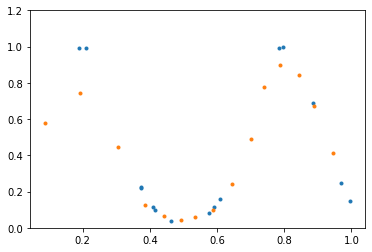

In [77]:
# [ v.name for v in h2.trainable_variables ]
def plot(xy):
    plt.figure('data')
    axes = plt.gca()
    # axes.set_xlim([xmin,xmax])
    axes.set_ylim([0,1.2])
    x,y = tf.split(xy[0], num_or_size_splits=2)
    plt.plot(x,y,'.')
d = [x for x in du.ds_array.shuffle(100).batch(1).take(100)][0]
d0 = d[0]
y0 = m(d[0], training=False)
y0 = tf.sigmoid(y0)
plot(d0)
plot(y0)



# TRY AEFIT5 on QSH2

In [3]:
qsh = Htls.QSH_Dataset()
import os
file = ipysh.abs_builddir+'/te_db_r15.npy'
if os.path.isfile(file):
    qsh.load(file)
else:
    qsh.load(ipysh.abs_builddir+'/te_db_2.npy')
    qsh.rebalance_prel(15)
    qsh.save(ipysh.abs_builddir+'/te_db_r15.npy')
    
qsh.shuffle()
qsh.clean_up_poorcurves(5)
qsh.dim = 15
qsh.set_null(np.nan)
qsh.set_normal_positive()
# qsh.unbias_mean(0.5, 'te')
# qsh.set_normal_positive()
# qsh.clip_values(0.1,0.6)

print("QSH rebalanced 15 points size: ", len(qsh))

QSH rebalanced 15 points size:  61519


In [ ]:
plt.figure('test')
x,y,_ = [x for x in qsh.ds_tuple.batch(100).take(1)][0]
plt.plot(x,y,'.');

In [4]:
m = models.AEFIT5.AEFIT5(latent_dim=2, feature_dim=30,  dprate=0., scale=1, beta=0.001)

AEFIT5 ready:


In [5]:
p = Hplt.LSPlotBokeh()
p.set_model(m)
# p.set_data(du, counts=1000)
p.set_data(qsh, counts=1000)
# p.train_browse_model(models.AEFIT4.AEFIT4)
p.plot(notebook_url='http://172.17.0.2:8888')

W0824 09:48:48.817818 140530252248896 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:504: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


Loading BokehJS ...

In [6]:
models.base.train_thread(m, qsh, batch=100, epoch=6, learning_rate=1e-3, callbacks=[]).control_panel()
# models.base.train_thread(m, du, batch=100, epoch=6, learning_rate=1e-3, callbacks=[]).control_panel()

Epoch 1/6


W0824 09:48:55.192008 140525952820992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:182: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


615/615 [==============================] - 29s 48ms/step - loss: 16.8330 - accuracy: 0.9384
Epoch 2/6
615/615 [==============================] - 25s 41ms/step - loss: 16.7696 - accuracy: 0.9991 1s -
Epoch 3/6
113/615 [====>.........................] - ETA: 22s - loss: 16.7487 - accuracy: 0.9993 ETA: 22s - loss: 16.7520 - accuracy

In [ ]:
qsh_pos = 0

In [ ]:
fig = plt.figure('test_curve',figsize=(18, 6))
plt.clf()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)    
# ax1.set_xlim(-2.,2.)
ax2.set_ylim(0.,1.)


for xy in qsh.ds_array.skip(qsh_pos).batch(1).take(1):    
    xy,_ = xy
    x,y = tf.split(xy,2, axis=1)
    ax2.scatter(x,y,s=80)
    me,_  = m.encode(xy, training=False)
    gpt = me[0].numpy()
    ax1.scatter(gpt[0],gpt[1])
    
    XY = m.decode(me,apply_sigmoid=True, training=False)
    X,Y = tf.split(XY[0], 2)
    X,Y = (X.numpy(), Y.numpy())
    ax2.scatter(X,Y,s=40)

print(qsh_pos)    
qsh_pos += 1